In [2]:
# importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importation des données

data = pd.read_csv('winequality-white.csv', sep = ';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
# Création de 2 tabmeaux : X qui contient les caractéristiques des boissons et 
# y qui contient la qualité
X = data[data.columns[:-1]].values
y = data['quality'].values

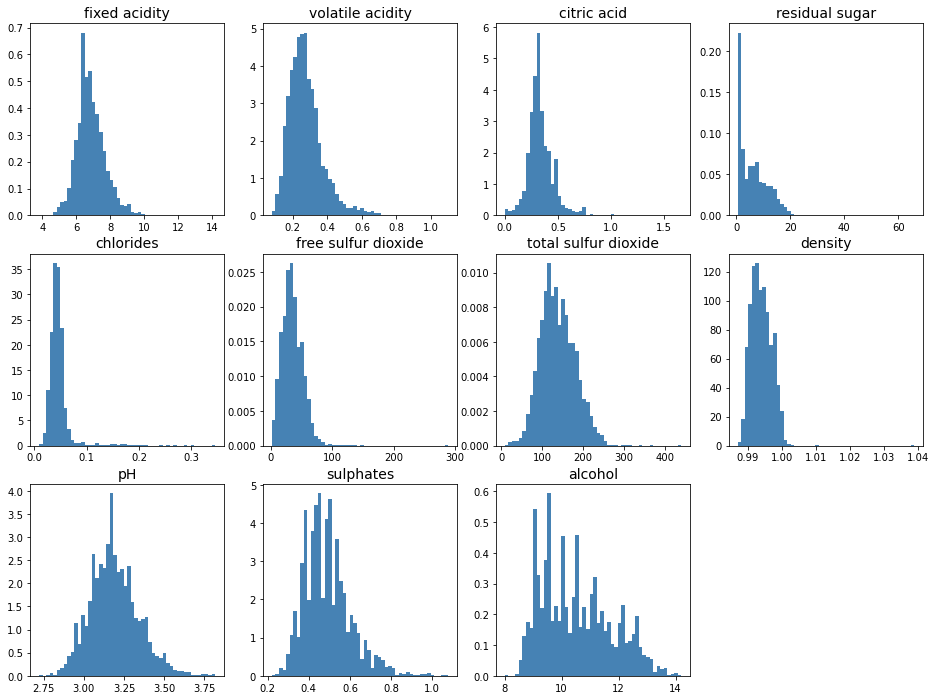

In [6]:
# histogramme pour chaque variable
fig = plt.figure(figsize = (16,12))
for i in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (i+1))
    h = ax.hist(X[:,i], bins = 50, color = 'steelblue',
               density = True)
    ax.set_title(data.columns[i], fontsize = 14)

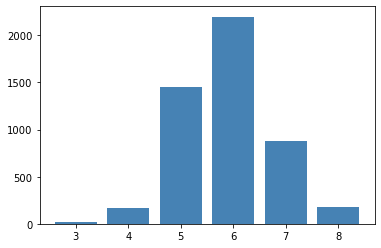

In [7]:
# histogramme de la variable quality
abs = range(np.min(y), np.max(y))
plt.bar(abs, [(y == a).sum() for a in abs], color = 'steelblue')
plt.show()

In [9]:
# Transformation du problème en classification binaire
y_class = np.where(y < 6, 0, 1)
print(y_class)

[1 1 1 ... 1 1 1]


In [ ]:
## Modélisation

In [11]:
# Séparation des données en training et testing test
from sklearn import model_selection
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y_class,
                                                               test_size = 0.3)

In [16]:
# Standardisation des données de training and testing set pou
# que les grandes valeurs n'écrasent pas les petites (normalisation)

from sklearn import preprocessing
std = preprocessing.StandardScaler().fit(X)
Xtrain_std = std.transform(Xtrain)
Xtest_std = std.transform(Xtest)

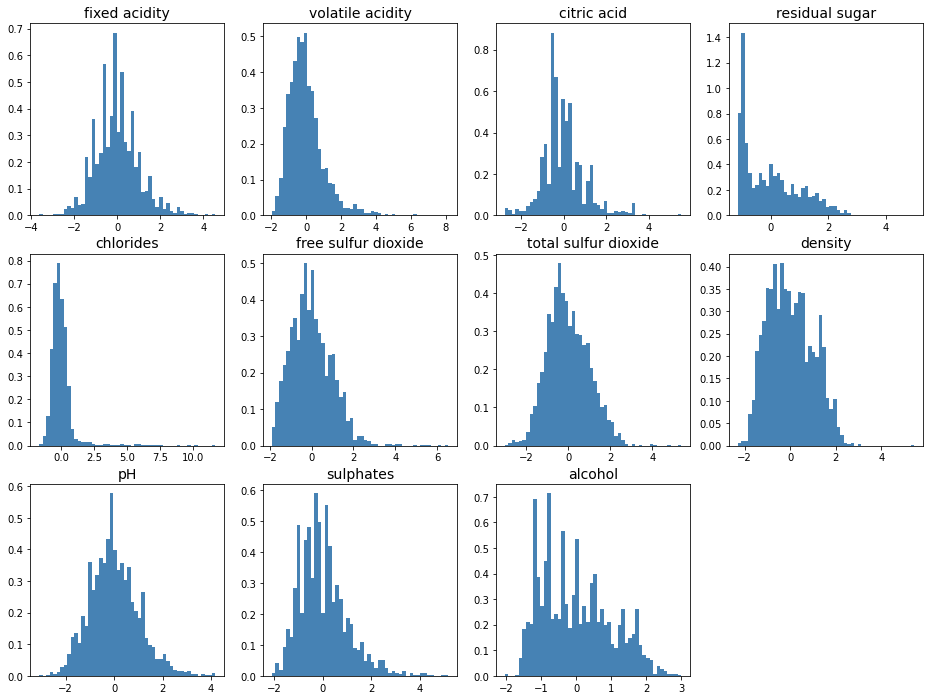

In [17]:
# Visualisation des variables pour vérifier si les valeurs 
# sont dans la même ordre de grandeur
fig = plt.figure(figsize = (16,12))
for i in range(Xtrain_std.shape[1]):
    ax = fig.add_subplot(3,4, (i+1))
    h = ax.hist(Xtrain_std[:,i], bins = 50, color = 'steelblue',
               density = True)
    ax.set_title(data.columns[i], fontsize = 14)

In [18]:
# Utilisation de la méthode GridSearchCV pour une validation croisée du
# paramètre k sur Xtrain

from sklearn import neighbors, metrics

grid_param = {'n_neighbors' : [3,5,7,9,11,13,15,17]}

In [19]:
# Création d'un classifiuer kNN avec recherche d'hyperparametre par 
# validation croisée

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # instance d'un classifieur kNN,
    grid_param, # hyperparametre à tester
    cv = 5, # nbre de folds de la validation croisée
    scoring = 'accuracy'  
    )

In [21]:
# Ajustement du classifieur sur le training set

clf.fit(Xtrain_std, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             scoring='accuracy')

In [23]:
# Affichage des meilleurs hyperamètres
print('Meilleurs hyperparametres sur le testing set : ')
print(clf.best_params_)

Meilleurs hyperparametres sur le testing set : 
{'n_neighbors': 13}


In [25]:
# Performances des modèles
print('Résultats de la validation croisée : ')
for mean, std, params in zip(
    clf.cv_results_['mean_test_score'], # score moyen
    clf.cv_results_['std_test_score'], # ecart type 
    clf.cv_results_['params'], # valeur de l'hyperparametre
):
    print("{} = {:.3f} (+/-{:.03}) for {}".format(
        'accuracy',
        mean,
        std*2,
        params
    ))

Résultats de la validation croisée : 
accuracy = 0.752 (+/-0.0276) for {'n_neighbors': 3}
accuracy = 0.750 (+/-0.0213) for {'n_neighbors': 5}
accuracy = 0.754 (+/-0.021) for {'n_neighbors': 7}
accuracy = 0.758 (+/-0.0189) for {'n_neighbors': 9}
accuracy = 0.760 (+/-0.0253) for {'n_neighbors': 11}
accuracy = 0.763 (+/-0.0236) for {'n_neighbors': 13}
accuracy = 0.759 (+/-0.0234) for {'n_neighbors': 15}
accuracy = 0.763 (+/-0.0244) for {'n_neighbors': 17}


In [40]:
# prediction sur le testing set tout en sachant que GridSearchCV
# a automatiquement entraîné le meilleur modèle sur l'intégralité
# du training set

ypred = clf.predict(Xtest_std)
print("\n Prédiction sur le jeu de test : {:.3f}".format(
    metrics.accuracy_score(ytest, ypred)
))


 Prédiction sur le jeu de test : 0.766


In [41]:
ypred

array([0, 1, 1, ..., 1, 1, 1])

In [29]:
## Evaluation du modèle

In [31]:
# matrice de confusion
mc = metrics.confusion_matrix(ytest, ypred)
print(mc)

[[274 191]
 [153 852]]


In [33]:
# Accuracy = taux de succès
print("\n Taux de succès : {:.3f}".format(
    metrics.accuracy_score(ytest, ypred)
))
print("\n Taux d'erreur : {:.3f}".format(
    1 - metrics.accuracy_score(ytest, ypred)
))


 Taux de succès : 0.766

 Taux d'erreur : 0.234


In [44]:
# probabilités de prediction
ypred_proba = clf.predict_proba(Xtest_std)[:,1]
print(ypred_proba)

[0.30769231 0.84615385 0.84615385 ... 0.61538462 0.76923077 0.61538462]


Text(0, 0.5, 'Sensibility')

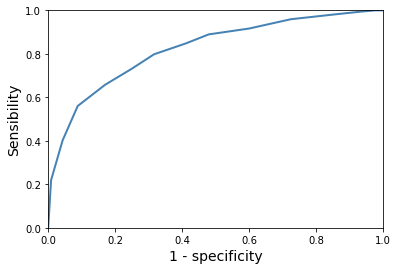

In [45]:
# courbe de ROC
[fpr, tpr, thr] = metrics.roc_curve(ytest, ypred_proba)
plt.plot(fpr, tpr, color = 'steelblue', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1 - specificity', fontsize = 14)
plt.ylabel('Sensibility', fontsize = 14) 

In [46]:
# AUROC
auroc = metrics.auc(fpr, tpr)
print(auroc)

0.8230193120419408


In [53]:
# Index du seuil pour lequel la sensibilité est superieure 
# à 0.95
idx = np.min(np.where(tpr > 0.95))
print('Sensibility : {:.2f}'.format(tpr[idx]))
print('1 - Specificity : {:.2f}'.format(fpr[idx]))
print('Specificity : {:.2f}'.format(1 - fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibility : 0.96
1 - Specificity : 0.72
Specificity : 0.28
Seuil : 0.31
